In [2]:
import cv2
import numpy as np

# Kernel size for Gaussian blur (denoising)
BLUR_KERNEL_SIZE = (3, 3)

# Factor to downsample the images (0.5 reduces the resolution to half)
DOWNSAMPLE_FACTOR = 0.3

# Lowe's ratio test threshold
LOWES_RATIO_THRESHOLD = 0.1

# Load the images
referenceImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/2010 atkinson pool.png')
capturedImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/2023 atkinson rotated.png')

#/Users/kids/Downloads/santa_nella_historical/santa_nella_satellite_2024.png
#/Users/kids/Downloads/santa_nella_historical/santa_nella_satellite_2009.png
#/Users/kids/Downloads/santa_nella_historical/santa_nella_satellite_2010.png
#/Users/kids/Downloads/santa_nella_historical/santa_nella_satellite_2011.png
#/Users/kids/Downloads/santa_nella_historical/santa_nella_satellite_2013.png

#referenceImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/santa_nella_satellite_2024.png')
#capturedImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/santanella_balloon.png')


# Apply Gaussian Blur for de-noising
capturedImageBlurred = cv2.GaussianBlur(capturedImage, BLUR_KERNEL_SIZE, 0)
referenceImageBlurred = cv2.GaussianBlur(referenceImage, BLUR_KERNEL_SIZE, 0)

# Downsample images to reduce resolution and emphasize significant features
capturedImageBlurredResized = cv2.resize(capturedImageBlurred, (0,0), fx=DOWNSAMPLE_FACTOR, fy=DOWNSAMPLE_FACTOR)
referenceImageBlurredResized = cv2.resize(referenceImageBlurred, (0,0), fx=DOWNSAMPLE_FACTOR, fy=DOWNSAMPLE_FACTOR)

# Convert images to grayscale
capGray = cv2.cvtColor(capturedImageBlurredResized, cv2.COLOR_BGR2GRAY)
refGray = cv2.cvtColor(referenceImageBlurredResized, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
capKeypoints, capDescriptors = sift.detectAndCompute(capGray, None)
refKeypoints, refDescriptors = sift.detectAndCompute(refGray, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform the matching
matches = flann.knnMatch(capDescriptors, refDescriptors, k=2)

# Apply Lowe's ratio test
good_matches = [m for m, n in matches if m.distance < LOWES_RATIO_THRESHOLD * n.distance]

# Extract location of good matches
points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

for i, match in enumerate(good_matches):
    points1[i, :] = capKeypoints[match.queryIdx].pt
    points2[i, :] = refKeypoints[match.trainIdx].pt

# Compute the affine transformation matrix
M, inliers = cv2.estimateAffinePartial2D(points1, points2)

# Apply the affine transformation
transformed_image = cv2.warpAffine(capturedImage, M, (referenceImage.shape[1], referenceImage.shape[0]))

# Show the original and transformed image
#cv2.imshow('Original', capturedImage)
#cv2.imshow('Transformed', transformed_image)
##cv2.waitKey(0)
#cv2.destroyAllWindows()


# Show the original and transformed image using matplotlib
show_image(capturedImage, "Original")
show_image(transformed_image, "Transformed")



error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/calib3d/src/ptsetreg.cpp:176: error: (-215:Assertion failed) count >= 0 && count2 == count in function 'run'


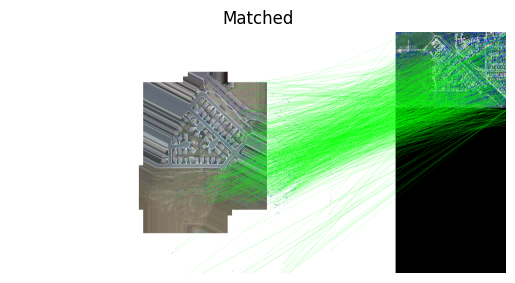

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to convert a BGR image to RGB for displaying correctly with matplotlib
def show_image(img, title="Image", cmap_type=None):
    if len(img.shape) == 3:  # Color image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:  # Grayscale image
        img_rgb = img
        cmap_type = 'gray'
    plt.imshow(img_rgb, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


# Kernel size for Gaussian blur (denoising)
BLUR_KERNEL_SIZE = (2, 2)

# Factor to downsample the images (0.5 reduces the resolution to half)
DOWNSAMPLE_FACTOR = 0

# Lowe's ratio test threshold
LOWES_RATIO_THRESHOLD = 0.9

# Load the images
referenceImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/santa_nella_satellite_2024.png')
capturedImage = cv2.imread('/Users/kids/Jupyter_notebook/Hab/santa_nella_balloon_rotation_adjusted.png')


# Apply Gaussian Blur for de-noising
#capturedImageBlurred = cv2.GaussianBlur(capturedImage, BLUR_KERNEL_SIZE, 0)
#referenceImageBlurred = cv2.GaussianBlur(referenceImage, BLUR_KERNEL_SIZE, 0)

# Downsample images to reduce resolution and emphasize significant features
#capturedImageBlurredResized = cv2.resize(capturedImageBlurred, (0,0), fx=DOWNSAMPLE_FACTOR, fy=DOWNSAMPLE_FACTOR)
#referenceImageBlurredResized = cv2.resize(referenceImageBlurred, (0,0), fx=DOWNSAMPLE_FACTOR, fy=DOWNSAMPLE_FACTOR)

# Convert images to grayscale
#capGray = cv2.cvtColor(capturedImageBlurredResized, cv2.COLOR_BGR2GRAY)
#refGray = cv2.cvtColor(referenceImageBlurredResized, cv2.COLOR_BGR2GRAY)

# Convert images to grayscale
capGray = cv2.cvtColor(capturedImage, cv2.COLOR_BGR2GRAY)
refGray = cv2.cvtColor(referenceImage, cv2.COLOR_BGR2GRAY)



# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
capKeypoints, capDescriptors = sift.detectAndCompute(capGray, None)
refKeypoints, refDescriptors = sift.detectAndCompute(refGray, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform the matching
matches = flann.knnMatch(capDescriptors, refDescriptors, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# Ratio test as per Lowe's paper
for i, (m,n) in enumerate(matches):
    if m.distance < LOWES_RATIO_THRESHOLD * n.distance:
        matchesMask[i] = [1,0]

# Convert matches to format required by drawMatchesKnn
good_matches = [m for m, mask in zip(matches, matchesMask) if mask[0]]

# Draw parameters
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=cv2.DrawMatchesFlags_DEFAULT)

# Drawing the matches
matched_image = cv2.drawMatchesKnn(capturedImageBlurredResized, capKeypoints, referenceImageBlurredResized, refKeypoints, matches, None, **draw_params)

# Display
#cv2.imshow('Matches', matched_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


show_image(matched_image, "Matched")

# Note: For further steps, such as finding a homography and warping the image, you would proceed from the list of good matches.
